# IMPORT THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier

# Loading the Data

In [3]:
p1=pd.read_csv('prospects_data.csv',engine='python')
p1

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,April'16,12-Apr-16,EC12041647402,Dealer,Lost,TAMILNADU,VELLORE,635751,Renovation,6 to 10,...,NaN,NaN,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,April'16,14-Apr-16,EC13041647531,Dealer,Lost,TAMILNADU,CHENNAI,600006,Renovation,1 to 5,...,NaN,Budget Constraint,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,April'16,15-Apr-16,EC15041647749,Dealer,Lost,TAMILNADU,CHENNAI,600113,New Construction,6 to 10,...,NaN,Price Issue,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
p1.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

RENAME THE COLUMNS

In [5]:
p1.columns = ['Month','Enquiry_Date', 'Enquiry_Id', 'Allocation_Status', 'Status',
                   'State', 'City', 'Pincode', 'Type_of_Project', 'No_of_Windows',
                   'Source', 'Zone', 'Dealer_Name', 'First_Action-Call_made',
                   'Date_DD/MM/YY', 'First-Action-Call-Status',
                   'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date-DD/MM/YY.1', 'Second-Action-Call-Status',
       'Third-Action-Quote-Given', 'Date-DD/MM/YY.2', 'Q-Val.(Rs.Lac)',
       'Quote-QTY', ' Order-Recd\Lost ', 'Date-DD/MM/YY.3',
       'Order-Val.(Rs.Lac)', 'Order_QTY',
       'Quote_ID(as_per_match_to_CCC_Records)',
       ' Remarks-Brand-and-value-if-lost-to-UPVC ',
       'Second-Action-Call-Status.1', 'Remarks', 'Price_Per_Sft', 'Benefits',
       'Aesthetics', 'Reduce_Street_Noise', 'Low_Maintenance', 'Monsoon_Proof',
       'Better_Lighting', 'Reduce_AC_Energy_Cost']

# REMOVE DATE COLUMNS

Dropping date columns as we are not using time series

In [6]:
p2=p1.drop(['Month','Enquiry_Date','Date_DD/MM/YY','Date of Appointment (DD/MM/YY)','Date-DD/MM/YY.1','Date-DD/MM/YY.2','Date-DD/MM/YY.3'],axis=1)

In [7]:
# Percentage of missing values in a column
for col in p2.columns:
    if p2[col].isnull().sum():
        print("Missing percentage in ",col," is ",round((p2[col].isnull().sum())*100/p2.shape[0],2))

Missing percentage in  Second Action-Customer Meeting  is  16.16
Missing percentage in  Second-Action-Call-Status  is  16.59
Missing percentage in  Third-Action-Quote-Given  is  17.47
Missing percentage in  Q-Val.(Rs.Lac)  is  20.09
Missing percentage in  Quote-QTY  is  20.09
Missing percentage in  Order-Val.(Rs.Lac)  is  79.04
Missing percentage in  Order_QTY  is  79.04
Missing percentage in  Quote_ID(as_per_match_to_CCC_Records)  is  49.34
Missing percentage in   Remarks-Brand-and-value-if-lost-to-UPVC   is  46.29
Missing percentage in  Second-Action-Call-Status.1  is  100.0
Missing percentage in  Remarks  is  25.33
Missing percentage in  Benefits  is  76.86
Missing percentage in  Aesthetics  is  83.84
Missing percentage in  Reduce_Street_Noise  is  83.84
Missing percentage in  Low_Maintenance  is  83.84
Missing percentage in  Monsoon_Proof  is  83.84
Missing percentage in  Better_Lighting  is  83.84
Missing percentage in  Reduce_AC_Energy_Cost  is  83.84


REMOVE REDUNDANT COLUMNS

In [8]:
p3=p2.drop(['Enquiry_Id','Pincode','State','First_Action-Call_made','Quote_ID(as_per_match_to_CCC_Records)','Benefits','Second-Action-Call-Status.1','Aesthetics', 'Reduce_Street_Noise', 'Low_Maintenance', 'Monsoon_Proof',
       'Better_Lighting', 'Reduce_AC_Energy_Cost'],axis=1)

In [9]:
def dealer_name(x):
    if x == 'pearlson':
        return 'Pearlson'
    else:
        return x

In [10]:
p2['Dealer_Name'] = p2['Dealer_Name'].apply(dealer_name)

In [11]:
p2.Dealer_Name.value_counts()

Direct        63
Windoors      45
Sunbird       36
Winfratech    20
OXXO          20
Pearlson      16
Rajtechnis    15
ITP           14
Name: Dealer_Name, dtype: int64

In [12]:
pd.crosstab(p3['Status'],p3[' Order-Recd\Lost '])

Order-Recd\Lost,Delivery Time Not Possible,Lost to Aluminum,Lost to UPVC (Provide details),Lost to Wooden,Order Received,Product Issue-Design/Type
Status,,,,,,
Lost,4,27,87,30,0,28
Won,0,0,0,0,53,0


1. In the Order Recd/Lost column , Won is represented as Order Received. Rest of observations are lost. 
2. For the OrdeR-QTY,Order-Price, The Received Orders are filled and lost orders are left out.
3. In the two columns related to remarks, Lost orders are filled and received orders are left out.
4. We can remove these columns.

In [13]:
p4=p3.drop([' Order-Recd\Lost ',' Remarks-Brand-and-value-if-lost-to-UPVC ','Remarks','Order-Val.(Rs.Lac)', 'Order_QTY', 'No_of_Windows'],axis=1)

In [14]:
p4.columns

Index(['Allocation_Status', 'Status', 'City', 'Type_of_Project', 'Source',
       'Zone', 'Dealer_Name', 'First-Action-Call-Status',
       'Second Action-Customer Meeting', 'Second-Action-Call-Status',
       'Third-Action-Quote-Given', 'Q-Val.(Rs.Lac)', 'Quote-QTY',
       'Price_Per_Sft'],
      dtype='object')

In [15]:
p4.shape

(229, 14)

In [16]:
p5 = p4.copy()

In [17]:
p5.shape

(229, 14)

# DATA CLEANING

In [18]:
Outcome=[]
for i in p5['Status']:
    if i=='Won':
        i=1
    else:
        i=0
    Outcome.append(i)    
p5['Outcome']=Outcome  
p5.head(10)

,Allocation_Status,Status,City,Type_of_Project,Source,Zone,Dealer_Name,First-Action-Call-Status,Second Action-Customer Meeting,Second-Action-Call-Status,Third-Action-Quote-Given,Q-Val.(Rs.Lac),Quote-QTY,Price_Per_Sft,Outcome
0,Dealer,Won,CHENNAI,Renovation,Friends or Family,Chennai,Sunbird,Appointment Fixed,yes,Quote to Be Submitted,yes,0.72,3,1105,1
1,Dealer,Lost,CHENNAI,New Construction,Just dial,Chennai,Winfratech,Appointment Fixed,yes,Further Meeting Required,NaN,NaN,NaN,985,0
2,Dealer,Lost,CHENNAI,New Construction,Current User,Chennai,Sunbird,Appointment Fixed,yes,Quote to Be Submitted,yes,8.40,42,918,0
3,Direct,Lost,KANCHIPURAM,New Construction,Friends or Family,Chennai,Direct,Appointment Fixed,yes,Quote to Be Submitted,yes,2.00,9,919,0
4,Direct,Won,CHENNAI,Renovation,Internet,Chennai,Sunbird,Appointment Fixed,yes,Quote to Be Submitted,yes,1.63,8,1350,1
5,Dealer,Lost,CHENNAI,Renovation,Friends or Family,Chennai,Rajtechnis,Appointment Fixed,yes,Quote to Be Submitted,yes,NaN,NaN,809,0
6,Dealer,Lost,CHENNAI,New Construction,Just dial,Chennai,Sunbird,Budget Constraint,NaN,NaN,NaN,NaN,NaN,1152,0
7,Dealer,Lost,VELLORE,Renovation,Just dial,Chennai,Windoors,Appointment Fixed,YES,Quote to Be Submitted,yes,2.14,9,826,0
8,Dealer,Lost,CHENNAI,Renovation,Just dial,Chennai,Sunbird,Budget Constraint,NaN,NaN,NaN,NaN,NaN,1089,0
9,Dealer,Lost,CHENNAI,New Construction,Friends or Family,Chennai,Sunbird,Appointment Fixed,yes,Quote to Be Submitted,yes,1.86,10,921,0


In [19]:
pd.value_counts(p5['Second Action-Customer Meeting'])

yes    171
YES     21
Name: Second Action-Customer Meeting, dtype: int64

In the 'Second Action-Customer Meeting' variable if we look at the value counts ,'yes' and 'YES' are treated differently because of case sensitivity. We replace 'YES' with 'yes'.

In [20]:
p5['Second Action-Customer Meeting'].replace(['YES'],'yes',inplace=True)
pd.value_counts(p5['Second Action-Customer Meeting'])

yes    192
Name: Second Action-Customer Meeting, dtype: int64

In [21]:
p5['Second Action-Customer Meeting'].value_counts()

yes    192
Name: Second Action-Customer Meeting, dtype: int64

This column has 37 missing values.The missing values in this column should be replaced by looking at the values corresponding to the 'First-Action-Call-Status' column. If the appointment is not fixed in the 'First action call status' then replace the values in the 'second action customer meeting' column with 'no'.

In [22]:
p5.loc[p5['First-Action-Call-Status']!='Appointment Fixed','Second Action-Customer Meeting']='no'
pd.value_counts(p5['Second Action-Customer Meeting'])

yes    192
no      37
Name: Second Action-Customer Meeting, dtype: int64

All the missing values are filled.

In [23]:
pd.value_counts(p5['Second-Action-Call-Status'])

Quote to Be Submitted       189
Further Meeting Required      1
Design not Feasible           1
Name: Second-Action-Call-Status, dtype: int64

The 'Second-Action-Call-Status' has missing values. The missing values in this column should be filled with 'no' whereever Second Action-Customer Meeting is 'no' .

In [24]:
p5.loc[p5['Second Action-Customer Meeting']=='no','Second-Action-Call-Status']='no'
pd.value_counts(p5['Second-Action-Call-Status'])

Quote to Be Submitted       189
no                           37
Further Meeting Required      1
Design not Feasible           1
Name: Second-Action-Call-Status, dtype: int64

In [25]:
sum(p5['Second-Action-Call-Status'].isnull())

1

Now only one missing value is remaining. Impute it with mode i.e., 'Quote to be submitted'

In [26]:
p5['Second-Action-Call-Status'].fillna('Quote to Be Submitted',inplace=True)

In [27]:
pd.value_counts(p5['Third-Action-Quote-Given'])

yes    167
YES     22
Name: Third-Action-Quote-Given, dtype: int64

In the 'Third-Action-Quote-Given' variable if we look at the value counts ,'yes' and 'YES' are treated differently because of case sensitivity. We replace 'YES' with 'yes'

In [28]:
p5['Third-Action-Quote-Given'].replace(['YES'],'yes',inplace=True)

The 'Third Action-Quote given' has missing values. The missing values in this column should be filled with 'no' whereever Second
Action Call Status' is 'no' .

In [29]:
p5.loc[p5['Second-Action-Call-Status']=='no','Third-Action-Quote-Given']='no'
pd.value_counts(p5['Third-Action-Quote-Given'])


yes    189
no      37
Name: Third-Action-Quote-Given, dtype: int64

In [30]:
sum(p5['Third-Action-Quote-Given'].isnull())

3

Still Three values are missing. We impute them with the mode of the column which is 'no'. We choose 'no' because the missing values have Design not Feasible,Further Meeting Required in the corresponding 'Second-Action-Call-Status' column. 

In [31]:
p5['Third-Action-Quote-Given'].fillna('no',inplace=True)

In [32]:
print(sum(p2[ 'Q-Val.(Rs.Lac)'].isnull()))
print(sum(p2[ 'Quote-QTY'].isnull()))

46
46


In [33]:
p5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 15 columns):
Allocation_Status                 229 non-null object
Status                            229 non-null object
City                              229 non-null object
Type_of_Project                   229 non-null object
Source                            229 non-null object
Zone                              229 non-null object
Dealer_Name                       229 non-null object
First-Action-Call-Status          229 non-null object
Second Action-Customer Meeting    229 non-null object
Second-Action-Call-Status         229 non-null object
Third-Action-Quote-Given          229 non-null object
Q-Val.(Rs.Lac)                    183 non-null float64
Quote-QTY                         183 non-null object
Price_Per_Sft                     229 non-null int64
Outcome                           229 non-null int64
dtypes: float64(1), int64(2), object(12)
memory usage: 26.9+ KB


The 'Q-Val.(Rs.Lac)','Quote-QTY' has missing values. The missing values in this column should be filled with '0' whereever 'Third-Action-Quote-Given'  is 'no'

In [34]:
p5.loc[p5['Third-Action-Quote-Given']=='no','Q-Val.(Rs.Lac)']=0
p5.loc[p5['Third-Action-Quote-Given']=='no','Quote-QTY']=0

In [35]:
print(sum(p5[ 'Q-Val.(Rs.Lac)'].isnull()))
print(sum(p5['Quote-QTY'].isnull()))

6
6


Still 6 values in the two columns are missing. Impute them with mean.

In [36]:
# Had changed it to categorical to impute mean
p5['Quote-QTY'] = pd.Categorical(p5['Quote-QTY']).codes

In [37]:
p5['Q-Val.(Rs.Lac)'].fillna(p5['Q-Val.(Rs.Lac)'].mean(),inplace=True)
p5['Quote-QTY'].fillna(p5['Quote-QTY'].mean(),inplace=True)

In [38]:
p6=p5.drop(['Status'],axis=1)

In [39]:
p6.head(10)

,Allocation_Status,City,Type_of_Project,Source,Zone,Dealer_Name,First-Action-Call-Status,Second Action-Customer Meeting,Second-Action-Call-Status,Third-Action-Quote-Given,Q-Val.(Rs.Lac),Quote-QTY,Price_Per_Sft,Outcome
0,Dealer,CHENNAI,Renovation,Friends or Family,Chennai,Sunbird,Appointment Fixed,yes,Quote to Be Submitted,yes,0.720000,22,1105,1
1,Dealer,CHENNAI,New Construction,Just dial,Chennai,Winfratech,Appointment Fixed,yes,Further Meeting Required,no,0.000000,0,985,0
2,Dealer,CHENNAI,New Construction,Current User,Chennai,Sunbird,Appointment Fixed,yes,Quote to Be Submitted,yes,8.400000,28,918,0
3,Direct,KANCHIPURAM,New Construction,Friends or Family,Chennai,Direct,Appointment Fixed,yes,Quote to Be Submitted,yes,2.000000,36,919,0
4,Direct,CHENNAI,Renovation,Internet,Chennai,Sunbird,Appointment Fixed,yes,Quote to Be Submitted,yes,1.630000,35,1350,1
5,Dealer,CHENNAI,Renovation,Friends or Family,Chennai,Rajtechnis,Appointment Fixed,yes,Quote to Be Submitted,yes,1.511973,-1,809,0
6,Dealer,CHENNAI,New Construction,Just dial,Chennai,Sunbird,Budget Constraint,no,no,no,0.000000,0,1152,0
7,Dealer,VELLORE,Renovation,Just dial,Chennai,Windoors,Appointment Fixed,yes,Quote to Be Submitted,yes,2.140000,36,826,0
8,Dealer,CHENNAI,Renovation,Just dial,Chennai,Sunbird,Budget Constraint,no,no,no,0.000000,0,1089,0
9,Dealer,CHENNAI,New Construction,Friends or Family,Chennai,Sunbird,Appointment Fixed,yes,Quote to Be Submitted,yes,1.860000,4,921,0


In [40]:
pd.crosstab(p6['First-Action-Call-Status'],p6['Second Action-Customer Meeting'])

Second Action-Customer Meeting,no,yes
First-Action-Call-Status,,
Appointment Fixed,0,192
Budget Constraint,25,0
Design not Feasible,6,0
No Requirement-Awareness Call,5,0
Time Frame Not Possible,1,0


 The First-Action-Call-Status outcome is appointment fixed for Second Action-Customer Meeting - Yes. So we can remove one column. Let us remove First-Action-Call-Status.

In [41]:
pd.crosstab(p6['Second-Action-Call-Status'],p6['Third-Action-Quote-Given'])

Third-Action-Quote-Given,no,yes
Second-Action-Call-Status,,
Design not Feasible,1,0
Further Meeting Required,1,0
Quote to Be Submitted,1,189
no,37,0


The Third action quote given value is 'yes' for Quote to be submitted and the rest of the values is no. So,we can remove one of the columns. Lets remove Third action quote given

In [42]:
pd.crosstab(p6['Quote-QTY'],p6['Second-Action-Call-Status']).T

Quote-QTY,-1,0,1,2,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,37
Second-Action-Call-Status,,,,,,,,,,,,,,,,,,,,,
Design not Feasible,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Further Meeting Required,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Quote to Be Submitted,6,1,1,41,1,3,1,4,4,1,...,2,1,8,1,4,5,1,8,7,1
no,0,37,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
pd.crosstab(p6['Second-Action-Call-Status'],p6['Q-Val.(Rs.Lac)'])

Q-Val.(Rs.Lac),0.0,0.01,0.08,0.15,0.16,0.2,0.21,0.25,0.26,0.3,...,5.7,5.8,6.0,8.4,8.87,9.0,9.5,10.0,10.95,25.0
Second-Action-Call-Status,,,,,,,,,,,,,,,,,,,,,
Design not Feasible,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Further Meeting Required,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Quote to Be Submitted,1,1,1,3,1,3,1,1,2,4,...,1,1,2,1,1,1,1,1,1,1
no,37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
p7=p6.drop(['First-Action-Call-Status'],axis=1)


In [45]:
p7.shape

(229, 13)

Cleaning the data and Changing the datatype of Quote quantity to numeric. 

In [46]:
def val(x):
    if x == '`1':
        return '1'
    else:
        return x

In [47]:
p7['Quote-QTY'] = p7['Quote-QTY'].apply(val)
p7["Quote-QTY"] = pd.to_numeric(p7["Quote-QTY"])

In [48]:
p7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 13 columns):
Allocation_Status                 229 non-null object
City                              229 non-null object
Type_of_Project                   229 non-null object
Source                            229 non-null object
Zone                              229 non-null object
Dealer_Name                       229 non-null object
Second Action-Customer Meeting    229 non-null object
Second-Action-Call-Status         229 non-null object
Third-Action-Quote-Given          229 non-null object
Q-Val.(Rs.Lac)                    229 non-null float64
Quote-QTY                         229 non-null int64
Price_Per_Sft                     229 non-null int64
Outcome                           229 non-null int64
dtypes: float64(1), int64(3), object(9)
memory usage: 23.3+ KB


#  Chi-square test of independence¶

In [49]:
for i in p7.columns:
    if p7[i].dtype == 'object':
        a,p,b,_=chi2_contingency(pd.crosstab(p7.Outcome,p7[i]))
        print("Outcome",i,p)

Outcome Allocation_Status 0.0007180251640489181
Outcome City 0.5892978298236788
Outcome Type_of_Project 0.9062989915031324
Outcome Source 0.7174873358226411
Outcome Zone 0.5233680158531887
Outcome Dealer_Name 0.002723641261414207
Outcome Second Action-Customer Meeting 0.0005978563104937521
Outcome Second-Action-Call-Status 0.002701593554191248
Outcome Third-Action-Quote-Given 0.00030153721002595637


Looking into the p value of Chi-square test of independance: 
1. Variables "Outcome" and "Allocation_Status" are found to be dependent.
2. Variables "Outcome" and "City" are found to be independent.
3. Variables "Outcome" and "Type_of_Project " are found to be independent.
4. Variables "Outcome" and "Source" are found to be independent.
5. Variables "Outcome" and "Zone" are found to be independent.
6. Variables "Outcome" and "Dealer_Name " are found to be dependent.
7. Variables "Outcome" and "Second Action-Customer" are found to be dependent.
8. Variables "Outcome" and "Second-Action-Call-Status" are found to be dependent.
9. Variables "Outcome" and "Third-Action-Quote" are found to be dependent.

But lets look into the columns once more later and decide to drop them or not

# Data Preprocessing

In [50]:
p_dummies=pd.get_dummies(p7)
p_dummies.shape

(229, 39)

For converting categorical variables to numerical variables, if we use dummies the column count is increasing to 38. It is not desired because because we have only 229 rows. so lets do label encoding.

Label Encoding

In [51]:
le=preprocessing.LabelEncoder()
p8=p7.apply(le.fit_transform)

Split p8 into Predictor and target variables.

In [52]:
x=p8.drop('Outcome',axis=1)
y=p8['Outcome']

Split the data into train and test. Here the class is not balanced. So, We use stratified sampling

In [53]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=7,stratify=y)

As we have Used label encoding we cant use distance and weight based ML algorithmn like Logistic Regression,KNN,SVM etc because these models capture the inherent hierarchy of the labels.
We can use tree based models.

# Modelling

# Decision Tree Classifier

In [54]:
dtree=tree.DecisionTreeClassifier(random_state=7)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [55]:
ypred_dtree=dtree.predict(x_test)
print('Accuracy:',accuracy_score(y_test,ypred_dtree))
print(classification_report(y_test,ypred_dtree))

Accuracy: 0.7971014492753623
             precision    recall  f1-score   support

          0       0.91      0.81      0.86        53
          1       0.55      0.75      0.63        16

avg / total       0.83      0.80      0.81        69



Area under the curve DT 0.7806603773584907


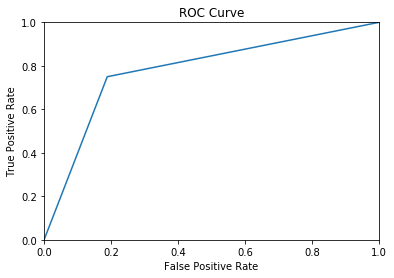

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_dtree )
roc_auc= auc(fpr,tpr)

# Plot ROC curve
print("Area under the curve DT", roc_auc)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Random Forest Classifier

In [57]:
x_train.shape

(160, 12)

In [58]:
rf=RandomForestClassifier(n_estimators=144,random_state=10)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=144, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [59]:
ypred_rf=rf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,ypred_rf))
print(classification_report(y_test,ypred_rf))

Accuracy: 0.9130434782608695
             precision    recall  f1-score   support

          0       0.90      1.00      0.95        53
          1       1.00      0.62      0.77        16

avg / total       0.92      0.91      0.91        69



Area under the curve 0.8125


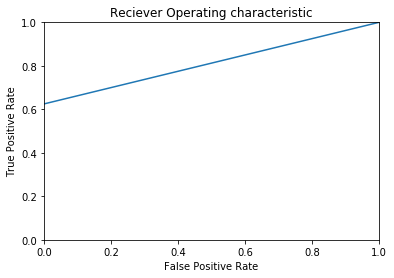

In [60]:
fpr,tpr,_ = roc_curve(y_test,ypred_rf)
roc_auc  = auc(fpr,tpr)
print('Area under the curve',roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciever Operating characteristic")
plt.show()

1. RandomForest Model is showing a good accuracy, precision,recall and AUC score.
2. Lets go ahead with random forest and improve its score

# Feature Engineering

                                importance                         columns
Price_Per_Sft                     0.369395                   Price_Per_Sft
Q-Val.(Rs.Lac)                    0.236762                  Q-Val.(Rs.Lac)
Quote-QTY                         0.138931                       Quote-QTY
Dealer_Name                       0.078672                     Dealer_Name
City                              0.041842                            City
Source                            0.040667                          Source
Type_of_Project                   0.031778                 Type_of_Project
Allocation_Status                 0.026561               Allocation_Status
Third-Action-Quote-Given          0.017649        Third-Action-Quote-Given
Second-Action-Call-Status         0.009710       Second-Action-Call-Status
Second Action-Customer Meeting    0.006205  Second Action-Customer Meeting
Zone                              0.001827                            Zone


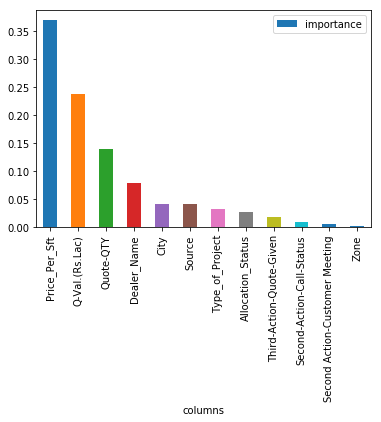

In [61]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances
feature_importances['columns']=feature_importances.index
print(feature_importances)

feature_importances.plot(kind='bar',x='columns',y='importance')

In [62]:
x1=x.drop(['Zone','Second-Action-Call-Status','Second Action-Customer Meeting'],axis=1)
x1.shape

(229, 9)

# Remodeling after applying Feature importance 

In [63]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x1,y,test_size=0.3,random_state=7,stratify=y)

In [64]:
rf1=RandomForestClassifier(n_estimators=90,random_state=7)
rf1.fit(x1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [65]:
y1pred_rf=rf1.predict(x1_test)
print('Accuracy:',accuracy_score(y1_test,y1pred_rf))
print(classification_report(y1_test,y1pred_rf))

Accuracy: 0.8985507246376812
             precision    recall  f1-score   support

          0       0.90      0.98      0.94        53
          1       0.91      0.62      0.74        16

avg / total       0.90      0.90      0.89        69



Area under the curve 0.8030660377358491


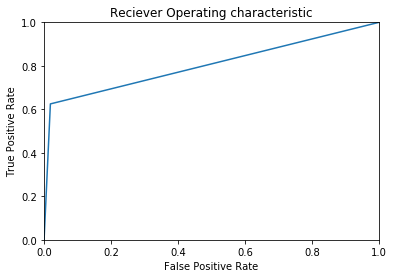

In [66]:
fpr,tpr,_ = roc_curve(y1_test,y1pred_rf)
roc_auc  = auc(fpr,tpr)
print('Area under the curve',roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciever Operating characteristic")
plt.show()

The Model has an improved its performance after removing redundant features.

1. Now we want to check whether our model is overfitted or not
2. For that we dont have any test data available. We have to use only the available data
3. So, Let us do KFOLD cross validation.
4. As the class is imbalanced, Let us use StratifiedKFOLD Cross Validation. 

# K-Fold Cross Validation

In [67]:
kfold = model_selection.StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
results = model_selection.cross_val_score(rf,x,y, cv=kfold)
print(results)
print(results.mean())

[0.88311688 0.87012987 0.85333333]
0.8688600288600289


As we can see our model is showing almost same cross-validation score for all the three different splits. So our model is not overfitted.

So, We finalize the 'rf' model.